In [ ]:
# 기본모델
# CPU

In [1]:
conda install tensorflow

Retrieving notices: ...working... done
Solving environment: done

# All requested packages already installed.


Note: you may need to restart the kernel to use updated packages.


In [230]:
import IPython
import IPython.display
import matplotlib as mpl
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
import tensorflow as tf

In [379]:
data = pd.read_csv('../data/cpu_memory_usage_20230409.csv', header=0)
# 231635
# 781952

In [380]:
data['time'] = pd.to_datetime(data['time'], unit='ns')
data = data.loc[data.namespace == 'drive']
date_time = pd.to_datetime(data['time'], format='%Y-%M-%D %H:%M:%S')
data

,name,tags,time,pod_name,namespace,mean_cpu_usage_nanocores,mean_memory_working_set_bytes
96,kubernetes_pod_container,NaN,2023-04-07 16:00:00,drive-az2-prd-85645f87d9-mpw5q,drive,1.773410e+07,1.334707e+09
100,kubernetes_pod_container,NaN,2023-04-07 16:00:00,drive-az2-prd-85645f87d9-s2kw8,drive,1.748167e+07,1.310027e+09
103,kubernetes_pod_container,NaN,2023-04-07 16:00:00,drive-az2-prd-85645f87d9-888jq,drive,1.104169e+07,1.272855e+09
109,kubernetes_pod_container,NaN,2023-04-07 16:00:00,drive-az2-prd-85645f87d9-bn97q,drive,1.801984e+07,1.403893e+09
112,kubernetes_pod_container,NaN,2023-04-07 16:00:00,drive-az2-prd-85645f87d9-rw5qk,drive,1.457886e+07,1.401893e+09
...,...,...,...,...,...,...,...
781535,kubernetes_pod_container,NaN,2023-03-03 00:00:00,drive-az2-prd-69cbb999bc-r6wq2,drive,1.082766e+08,1.202945e+09
781651,kubernetes_pod_container,NaN,2023-03-03 00:00:00,drive-az2-prd-69cbb999bc-g5dpb,drive,6.636116e+07,1.283052e+09
781664,kubernetes_pod_container,NaN,2023-03-03 00:00:00,drive-az2-prd-69cbb999bc-gw9xt,drive,1.145962e+08,1.308961e+09
781815,kubernetes_pod_container,NaN,2023-03-03 00:00:00,drive-az2-prd-69cbb999bc-wklkm,drive,1.155693e+08,1.225552e+09


In [381]:
def create_sequences(data, seq_length):
    xs = []
    ys = []
    for i in range(len(data)-seq_length):
        x = data.iloc[i:(i+seq_length)]
        y = data.iloc[i+seq_length]
        xs.append(x)
        ys.append(y)
    return np.array(xs), np.array(ys)

In [382]:
data = data.loc[:,['mean_cpu_usage_nanocores']]

In [383]:
seq_length = 24
X, Y = create_sequences(data, seq_length)
X.shape, Y.shape
X[0] #1.27417204e+09

array([[17734104.05769231],
       [17481666.75238095],
       [11041692.15384615],
       [18019837.39047619],
       [14578861.0952381 ],
       [15149851.08653846],
       [20539385.42857143],
       [12987612.46153846],
       [14519966.86666667],
       [14183189.53846154],
       [24481945.70833333],
       [24103837.51666667],
       [17288989.18333333],
       [20405199.78333334],
       [27683850.33333333],
       [22005174.25833333],
       [28478416.50833333],
       [18356437.275     ],
       [19545989.15      ],
       [17594825.925     ],
       [30873869.325     ],
       [35324100.75      ],
       [37154520.375     ],
       [41052857.25      ]])

In [384]:
train_size = 8000
offset_size = 500
X_train, y_train = X[:train_size], Y[:train_size]
X_val, y_val = X[train_size:train_size+offset_size], Y[train_size:train_size+offset_size]
X_test, y_test = X[train_size+offset_size:], Y[train_size+offset_size:]

In [385]:

MIN = X_train.min()
MAX = X_train.max()

In [386]:

def MinMaxScale(array, min, max):

    return (array - min) / (max - min)


In [387]:

#MinMax 스케일링
X_train = MinMaxScale(X_train, MIN, MAX)
y_train = MinMaxScale(y_train, MIN, MAX)
X_val = MinMaxScale(X_val, MIN, MAX)
y_val = MinMaxScale(y_val, MIN, MAX)
X_test = MinMaxScale(X_test, MIN, MAX)
y_test = MinMaxScale(y_test, MIN, MAX)

In [388]:
y_train = pd.DataFrame(y_train, columns = ['mean_cpu_usage_nanocores'])
y_val = pd.DataFrame(y_val, columns = ['mean_cpu_usage_nanocores'])

y_test = pd.DataFrame(y_test, columns = ['mean_cpu_usage_nanocores'])
y_test


,mean_cpu_usage_nanocores
0,0.040275
1,0.072292
2,0.060483
3,0.072491
4,0.070186
...,...
1024,0.203711
1025,0.120887
1026,0.216199
1027,0.218122


In [389]:

X_train_tensors_f = tf.reshape(X_train,   (X_train.shape[0], 1, X_train.shape[1]))
X_test_tensors_f = tf.reshape(X_test,  (X_test.shape[0], 1, X_test.shape[1])) 

print("Training Shape", X_train_tensors_f.shape, y_train.shape)
print("Testing Shape", X_test_tensors_f.shape, y_test.shape) 


Training Shape (8000, 1, 24) (8000, 1)
Testing Shape (1029, 1, 24) (1029, 1)


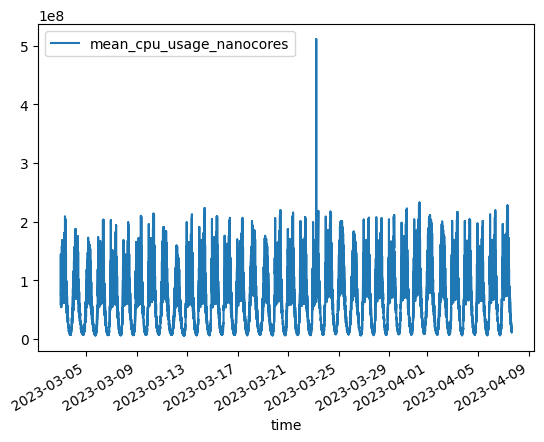

In [390]:
plot_cols = ['mean_cpu_usage_nanocores']
plot_features = data[plot_cols]
plot_features.index = date_time
_ = plot_features.plot(subplots=True)

# plot_features = data[plot_cols][:1440]
# plot_features.index = date_time[:1440]
# _ = plot_features.plot(subplots=True)

In [391]:
class WindowGenerator():
  def __init__(self, input_width, label_width, shift,
               train_df=y_train, test_df=y_test,
               label_columns=None):
    # Store the raw data.
    self.train_df = train_df
    self.test_df = test_df

    # Work out the label column indices.
    self.label_columns = label_columns
    if label_columns is not None:
      self.label_columns_indices = {name: i for i, name in
                                    enumerate(label_columns)}
    self.column_indices = {name: i for i, name in
                           enumerate(train_df.columns)}

    # Work out the window parameters.
    self.input_width = input_width
    self.label_width = label_width
    self.shift = shift

    self.total_window_size = input_width + shift

    self.input_slice = slice(0, input_width)
    self.input_indices = np.arange(self.total_window_size)[self.input_slice]

    self.label_start = self.total_window_size - self.label_width
    self.labels_slice = slice(self.label_start, None)
    self.label_indices = np.arange(self.total_window_size)[self.labels_slice]

  def __repr__(self):
    return '\n'.join([
        f'Total window size: {self.total_window_size}',
        f'Input indices: {self.input_indices}',
        f'Label indices: {self.label_indices}',
        f'Label column name(s): {self.label_columns}'])

In [392]:
def split_window(self, features):
  inputs = features[:, self.input_slice, :]
  labels = features[:, self.labels_slice, :]
  if self.label_columns is not None:
    labels = tf.stack(
        [labels[:, :, self.column_indices[name]] for name in self.label_columns],
        axis=-1)

  # Slicing doesn't preserve static shape information, so set the shapes
  # manually. This way the `tf.data.Datasets` are easier to inspect.
  inputs.set_shape([None, self.input_width, None])
  labels.set_shape([None, self.label_width, None])

  return inputs, labels

WindowGenerator.split_window = split_window

In [393]:
def make_dataset(self, data):
  data = np.array(data, dtype=np.float32)
  ds = tf.keras.utils.timeseries_dataset_from_array(
      data=data,
      targets=None,
      sequence_length=self.total_window_size,
      sequence_stride=1,
      shuffle=True,
      batch_size=32,)

  ds = ds.map(self.split_window)

  return ds

WindowGenerator.make_dataset = make_dataset

In [394]:
@property
def train(self):
  return self.make_dataset(self.train_df)

@property
def test(self):
  return self.make_dataset(self.test_df)

@property
def example(self):
  """Get and cache an example batch of `inputs, labels` for plotting."""
  result = getattr(self, '_example', None)
  if result is None:
    # No example batch was found, so get one from the `.train` dataset
    result = next(iter(self.train))
    # And cache it for next time
    self._example = result
  return result

WindowGenerator.train = train
WindowGenerator.test = test
WindowGenerator.example = example

In [399]:
single_step_window = WindowGenerator(
    input_width=96, label_width=96, shift=1,
    label_columns=['mean_cpu_usage_nanocores'])
single_step_window

Total window size: 97
Input indices: [ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23
 24 25 26 27 28 29 30 31 32 33 34 35 36 37 38 39 40 41 42 43 44 45 46 47
 48 49 50 51 52 53 54 55 56 57 58 59 60 61 62 63 64 65 66 67 68 69 70 71
 72 73 74 75 76 77 78 79 80 81 82 83 84 85 86 87 88 89 90 91 92 93 94 95]
Label indices: [ 1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23 24
 25 26 27 28 29 30 31 32 33 34 35 36 37 38 39 40 41 42 43 44 45 46 47 48
 49 50 51 52 53 54 55 56 57 58 59 60 61 62 63 64 65 66 67 68 69 70 71 72
 73 74 75 76 77 78 79 80 81 82 83 84 85 86 87 88 89 90 91 92 93 94 95 96]
Label column name(s): ['mean_cpu_usage_nanocores']

In [400]:
example_window = tf.stack([np.array(y_train[:single_step_window.total_window_size]),
                           np.array(y_train[1000:1000+single_step_window.total_window_size]),
                           np.array(y_train[2000:2000+single_step_window.total_window_size])])

example_inputs, example_labels = single_step_window.split_window(example_window)

print('All shapes are: (batch, time, features)')
print(f'Window shape: {example_window.shape}')
print(f'Inputs shape: {example_inputs.shape}')
print(f'Labels shape: {example_labels.shape}')

All shapes are: (batch, time, features)
Window shape: (3, 97, 1)
Inputs shape: (3, 96, 1)
Labels shape: (3, 96, 1)


In [401]:
class Baseline(tf.keras.Model):
  def __init__(self, label_index=None):
    super().__init__()
    self.label_index = label_index

  def call(self, inputs):
    if self.label_index is None:
      return inputs
    result = inputs[:, :, self.label_index]
    return result[:, :, tf.newaxis]

In [402]:
column_indices = {name: i for i, name in enumerate(data.columns)}
baseline = Baseline(label_index=column_indices['mean_cpu_usage_nanocores'])

baseline.compile(loss=tf.keras.losses.MeanSquaredError(),
                 metrics=[tf.keras.metrics.MeanAbsoluteError()])

performance = {}
performance['Baseline'] = baseline.evaluate(single_step_window.test, verbose=0)
performance

{'Baseline': [0.0034701598342508078, 0.03696293756365776]}

In [403]:
inputs, labels = single_step_window.example
train_predict = baseline(inputs)
train_predict.shape

TensorShape([32, 96, 1])

In [405]:
plot_col_index = single_step_window.column_indices['mean_cpu_usage_nanocores']
plot_col_index

0

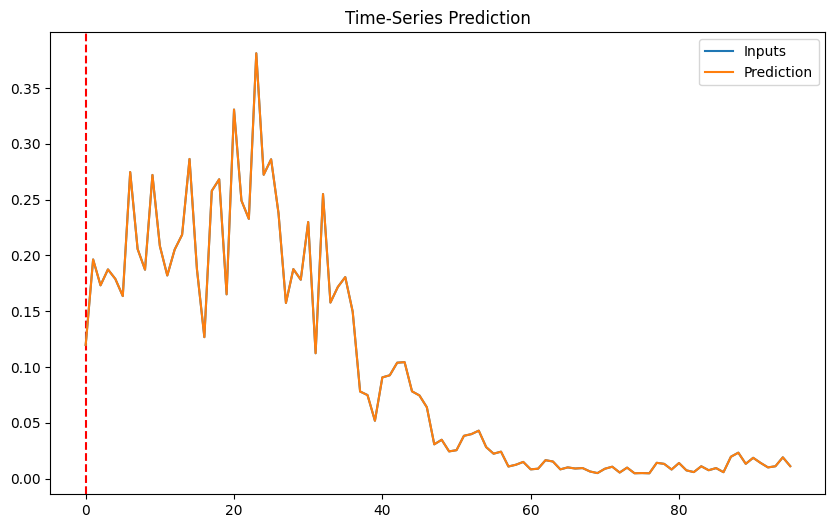

In [406]:

plt.figure(figsize=(10,6)) 
plt.axvline(c='r', linestyle='--') 
plt.plot(single_step_window.input_indices, inputs[0, :, plot_col_index],
            label='Inputs')
plt.plot(single_step_window.input_indices, train_predict[0, :, single_step_window.label_columns_indices.get('mean_cpu_usage_nanocores', None)],
            label='Prediction')
# plt.scatter(single_step_window.label_indices, train_predict[0, :, single_step_window.label_columns_indices.get('memory_working_set_bytes', None)],
#             marker='X', edgecolors='k', label='Predictions',
#             c='#ff7f0e', s=64)

plt.title('Time-Series Prediction')
plt.legend()
plt.show() 

In [407]:
lstm_model = tf.keras.models.Sequential([
    # Shape [batch, time, features] => [batch, time, lstm_units]
    tf.keras.layers.LSTM(32, return_sequences=False, activation="relu"),
    # Shape => [batch, time, features]
    tf.keras.layers.Dense(units=32, activation='relu'),
    tf.keras.layers.Dense(units=1)
])

In [408]:
import os
from keras.callbacks import EarlyStopping, ModelCheckpoint

MAX_EPOCHS = 1000

early_stopping = tf.keras.callbacks.EarlyStopping(monitor='loss',
                                                patience=2,
                                                mode='min')

lstm_model.compile(loss=tf.keras.losses.MeanSquaredError(),
            optimizer=tf.keras.optimizers.Adam(),
            metrics=[tf.keras.metrics.MeanAbsoluteError()])

model_path = 'model'
filename = os.path.join(model_path, 'tmp_checkpoint_v3.h5')
checkpoint = ModelCheckpoint(filename, monitor='loss', verbose=1, save_best_only=True, mode='auto')
history = lstm_model.fit(X_train_tensors_f, y_train, epochs=MAX_EPOCHS,
                    callbacks=[early_stopping, checkpoint])


Epoch 1/1000
237/250 [===========================>..] - ETA: 0s - loss: 0.0035 - mean_absolute_error: 0.0407
Epoch 1: loss improved from inf to 0.00345, saving model to model/tmp_checkpoint_v3.h5
250/250 [==============================] - 1s 689us/step - loss: 0.0035 - mean_absolute_error: 0.0403
Epoch 2/1000
203/250 [=======================>......] - ETA: 0s - loss: 0.0021 - mean_absolute_error: 0.0303
Epoch 2: loss improved from 0.00345 to 0.00201, saving model to model/tmp_checkpoint_v3.h5
250/250 [==============================] - 0s 1ms/step - loss: 0.0020 - mean_absolute_error: 0.0300
Epoch 3/1000
217/250 [=========================>....] - ETA: 0s - loss: 0.0020 - mean_absolute_error: 0.0297
Epoch 3: loss improved from 0.00201 to 0.00196, saving model to model/tmp_checkpoint_v3.h5
250/250 [==============================] - 0s 731us/step - loss: 0.0020 - mean_absolute_error: 0.0296
Epoch 4/1000
225/250 [==========================>...] - ETA: 0s - loss: 0.0019 - mean_absolute_error

In [409]:
performance['lstm_model'] = lstm_model.evaluate(X_test_tensors_f, y_test, verbose=0)

In [410]:
train_predict = lstm_model.predict(X_test_tensors_f)

33/33 [==============================] - 0s 479us/step


In [317]:
train_predict

array([[0.18871504],
       [0.2124412 ],
       [0.22888309],
       ...,
       [0.19900805],
       [0.1935426 ],
       [0.21181867]], dtype=float32)

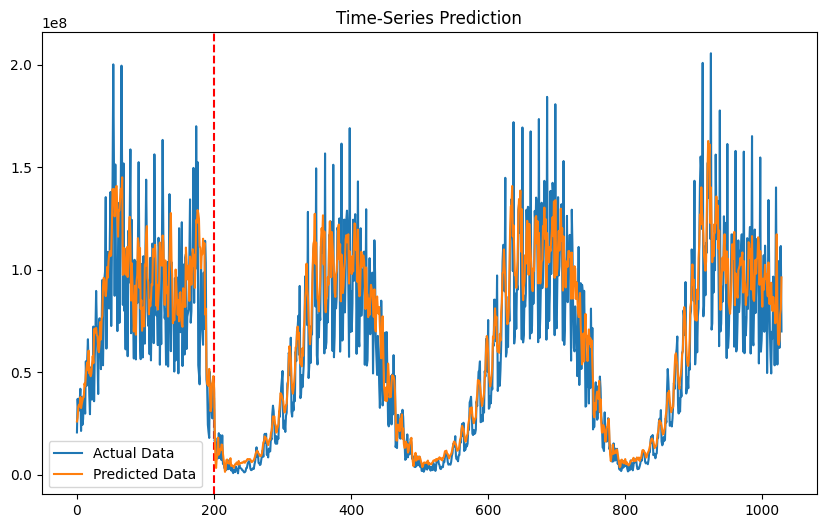

In [411]:

predicted= train_predict * MAX
label_y = y_test * MAX
plt.figure(figsize=(10,6)) 
plt.axvline(x=200, c='r', linestyle='--') 

plt.plot(label_y, label='Actual Data') 
plt.plot(predicted, label='Predicted Data') 
plt.title('Time-Series Prediction')
plt.legend()
plt.show() 

In [412]:
gru_model = tf.keras.models.Sequential([
    # Shape [batch, time, features] => [batch, time, lstm_units]
    tf.keras.layers.GRU(32, return_sequences=False),
    # Shape => [batch, time, features]
    tf.keras.layers.Dense(units=1)
])

In [413]:
import os
from keras.callbacks import EarlyStopping, ModelCheckpoint
MAX_EPOCHS = 1000

early_stopping = tf.keras.callbacks.EarlyStopping(monitor='loss',
                                                patience=2,
                                                mode='min')

gru_model.compile(loss=tf.keras.losses.MeanSquaredError(),
            optimizer=tf.keras.optimizers.Adam(),
            metrics=[tf.keras.metrics.MeanAbsoluteError()])

model_path = 'model'
filename = os.path.join(model_path, 'tmp_checkpoint_v3.h5')
checkpoint = ModelCheckpoint(filename, monitor='loss', verbose=1, save_best_only=True, mode='auto')
history = gru_model.fit(X_train_tensors_f, y_train, epochs=MAX_EPOCHS,
                    callbacks=[early_stopping, checkpoint])

Epoch 1/1000
214/250 [========================>.....] - ETA: 0s - loss: 0.0026 - mean_absolute_error: 0.0350
Epoch 1: loss improved from inf to 0.00255, saving model to model/tmp_checkpoint_v3.h5
250/250 [==============================] - 1s 1ms/step - loss: 0.0025 - mean_absolute_error: 0.0345
Epoch 2/1000
243/250 [============================>.] - ETA: 0s - loss: 0.0021 - mean_absolute_error: 0.0304
Epoch 2: loss improved from 0.00255 to 0.00206, saving model to model/tmp_checkpoint_v3.h5
250/250 [==============================] - 0s 659us/step - loss: 0.0021 - mean_absolute_error: 0.0303
Epoch 3/1000
228/250 [==========================>...] - ETA: 0s - loss: 0.0020 - mean_absolute_error: 0.0294
Epoch 3: loss improved from 0.00206 to 0.00199, saving model to model/tmp_checkpoint_v3.h5
250/250 [==============================] - 0s 693us/step - loss: 0.0020 - mean_absolute_error: 0.0297
Epoch 4/1000
228/250 [==========================>...] - ETA: 0s - loss: 0.0020 - mean_absolute_error

In [414]:
performance['gru_model'] = gru_model.evaluate(X_test_tensors_f, y_test, verbose=0)

In [415]:
train_predict = gru_model(X_test_tensors_f)
train_predict.shape

TensorShape([1029, 1])

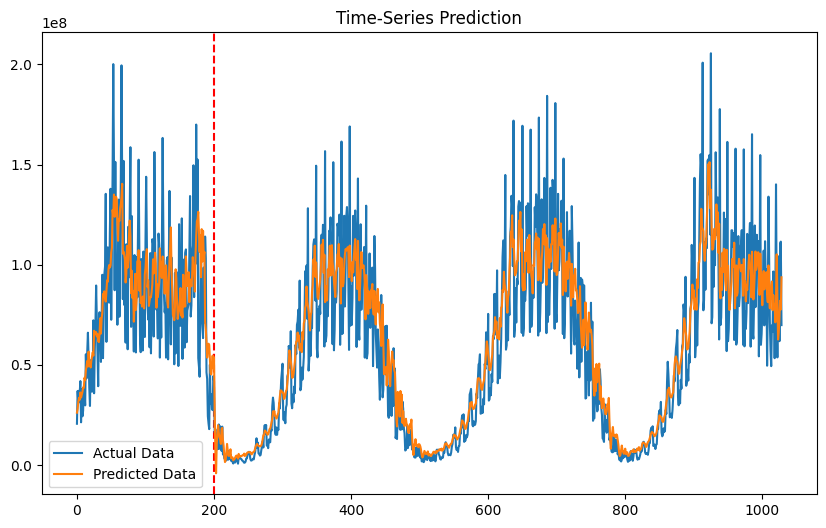

In [416]:
predicted= train_predict * MAX
label_y = y_test * MAX
plt.figure(figsize=(10,6)) 
plt.axvline(x=200, c='r', linestyle='--') 

plt.plot(label_y, label='Actual Data') 
plt.plot(predicted, label='Predicted Data') 
plt.title('Time-Series Prediction')
plt.legend()
plt.show() 

In [417]:
biLSTM1_model = tf.keras.models.Sequential()
biLSTM1_model.add(tf.keras.layers.Bidirectional(tf.keras.layers.LSTM(32, return_sequences=True)))
biLSTM1_model.add(tf.keras.layers.Bidirectional(tf.keras.layers.LSTM(32)))
biLSTM1_model.add(tf.keras.layers.Dense(5))
# biLSTM1_model.add(tf.keras.layers.Activation('softmax'))

In [418]:
import os
from keras.callbacks import EarlyStopping, ModelCheckpoint
MAX_EPOCHS = 1000

early_stopping = tf.keras.callbacks.EarlyStopping(monitor='loss',
                                                patience=10,
                                                mode='min')

biLSTM1_model.compile(loss=tf.keras.losses.MeanSquaredError(),
            optimizer=tf.keras.optimizers.Adam(),
            metrics=[tf.keras.metrics.MeanAbsoluteError()])

model_path = 'model'
filename = os.path.join(model_path, 'tmp_checkpoint_v3.h5')
checkpoint = ModelCheckpoint(filename, monitor='loss', verbose=1, save_best_only=True, mode='auto')
history = biLSTM1_model.fit(X_train_tensors_f, y_train, epochs=MAX_EPOCHS,
                    callbacks=[early_stopping, checkpoint])

Epoch 1/1000
249/250 [============================>.] - ETA: 0s - loss: 0.0039 - mean_absolute_error: 0.0439
Epoch 1: loss improved from inf to 0.00390, saving model to model/tmp_checkpoint_v3.h5
250/250 [==============================] - 2s 1ms/step - loss: 0.0039 - mean_absolute_error: 0.0439
Epoch 2/1000
248/250 [============================>.] - ETA: 0s - loss: 0.0022 - mean_absolute_error: 0.0314
Epoch 2: loss improved from 0.00390 to 0.00217, saving model to model/tmp_checkpoint_v3.h5
250/250 [==============================] - 0s 2ms/step - loss: 0.0022 - mean_absolute_error: 0.0314
Epoch 3/1000
229/250 [==========================>...] - ETA: 0s - loss: 0.0021 - mean_absolute_error: 0.0301
Epoch 3: loss improved from 0.00217 to 0.00203, saving model to model/tmp_checkpoint_v3.h5
250/250 [==============================] - 0s 1ms/step - loss: 0.0020 - mean_absolute_error: 0.0301
Epoch 4/1000
238/250 [===========================>..] - ETA: 0s - loss: 0.0020 - mean_absolute_error: 0.

In [419]:
performance['biLSTM1_model'] = biLSTM1_model.evaluate(X_test_tensors_f, y_test, verbose=0)

In [420]:
train_predict = biLSTM1_model.predict(X_test_tensors_f)
train_predict.shape

33/33 [==============================] - 1s 789us/step


(1029, 5)

33/33 [==============================] - 0s 756us/step


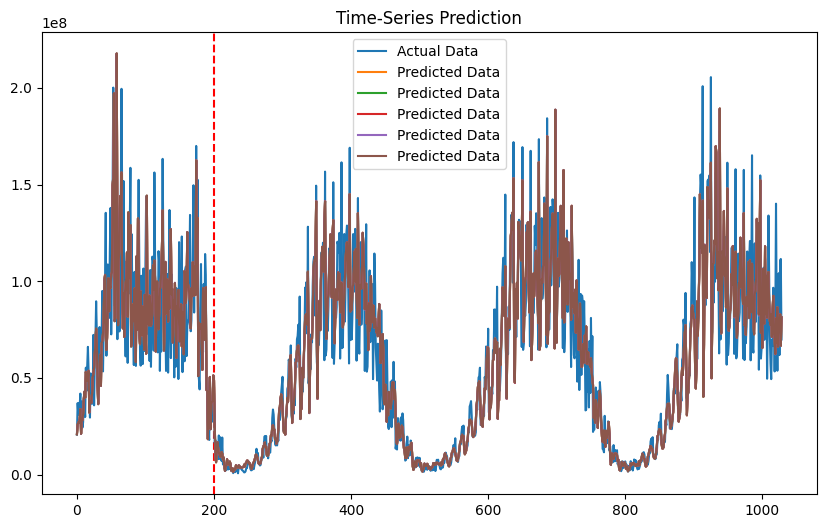

In [421]:

train_predict = biLSTM1_model.predict(X_test_tensors_f)
train_predict.shape
predicted= train_predict * MAX
label_y = y_test * MAX
plt.figure(figsize=(10,6)) 
plt.axvline(x=200, c='r', linestyle='--') 

plt.plot(label_y, label='Actual Data') 
plt.plot(predicted, label='Predicted Data') 
plt.title('Time-Series Prediction')
plt.legend()
plt.show() 

In [422]:
# With custom backward layer
biLSTM2_model = tf.keras.models.Sequential()
forward_layer = tf.keras.layers.LSTM(32, return_sequences=True)
backward_layer = tf.keras.layers.LSTM(32, return_sequences=True,
                      go_backwards=True)
biLSTM2_model.add(tf.keras.layers.Bidirectional(forward_layer, backward_layer=backward_layer))
biLSTM2_model.add(tf.keras.layers.Dense(1))

In [423]:
import os
from keras.callbacks import EarlyStopping, ModelCheckpoint
MAX_EPOCHS = 100

early_stopping = tf.keras.callbacks.EarlyStopping(monitor='loss',
                                                patience=10,
                                                mode='min')

biLSTM2_model.compile(loss=tf.keras.losses.MeanSquaredError(),
            optimizer=tf.keras.optimizers.Adam(),
            metrics=[tf.keras.metrics.MeanAbsoluteError()])

model_path = 'model'
filename = os.path.join(model_path, 'tmp_checkpoint_v3.h5')
checkpoint = ModelCheckpoint(filename, monitor='loss', verbose=1, save_best_only=True, mode='auto')
history = biLSTM2_model.fit(X_train_tensors_f, y_train, epochs=MAX_EPOCHS,
                    callbacks=[early_stopping, checkpoint])

Epoch 1/100
233/250 [==========================>...] - ETA: 0s - loss: 0.0042 - mean_absolute_error: 0.0451
Epoch 1: loss improved from inf to 0.00403, saving model to model/tmp_checkpoint_v3.h5
250/250 [==============================] - 2s 1ms/step - loss: 0.0040 - mean_absolute_error: 0.0443
Epoch 2/100
249/250 [============================>.] - ETA: 0s - loss: 0.0022 - mean_absolute_error: 0.0317
Epoch 2: loss improved from 0.00403 to 0.00218, saving model to model/tmp_checkpoint_v3.h5
250/250 [==============================] - 0s 858us/step - loss: 0.0022 - mean_absolute_error: 0.0317
Epoch 3/100
207/250 [=======================>......] - ETA: 0s - loss: 0.0021 - mean_absolute_error: 0.0306
Epoch 3: loss improved from 0.00218 to 0.00204, saving model to model/tmp_checkpoint_v3.h5
250/250 [==============================] - 0s 1000us/step - loss: 0.0020 - mean_absolute_error: 0.0303
Epoch 4/100
187/250 [=====================>........] - ETA: 0s - loss: 0.0019 - mean_absolute_error: 0

In [424]:
performance['biLSTM2_model'] = biLSTM2_model.evaluate(X_test_tensors_f, y_test, verbose=0)

In [425]:
train_predict = biLSTM2_model.predict(X_test_tensors_f)
train_predict.shape
# train_predict

33/33 [==============================] - 0s 623us/step


(1029, 1, 1)

In [426]:
biLSTM3_model = tf.keras.models.Sequential([
        tf.keras.layers.Input(shape=X_train_tensors_f.shape[-2:]),
        tf.keras.layers.Bidirectional(tf.keras.layers.LSTM(1024, return_sequences=True)),
        tf.keras.layers.Bidirectional(tf.keras.layers.LSTM(512, return_sequences=True)),
        tf.keras.layers.Bidirectional(tf.keras.layers.LSTM(256, return_sequences=True)),
        tf.keras.layers.Bidirectional(tf.keras.layers.LSTM(128, return_sequences=True)),
        tf.keras.layers.Dense(128, activation='selu'),
        tf.keras.layers.Dense(1),
    ])

In [427]:
import os
from keras.callbacks import EarlyStopping, ModelCheckpoint
MAX_EPOCHS = 10

early_stopping = tf.keras.callbacks.EarlyStopping(monitor='loss',
                                                patience=10,
                                                mode='min')

biLSTM3_model.compile(loss=tf.keras.losses.MeanSquaredError(),
            optimizer=tf.keras.optimizers.Adam(),
            metrics=[tf.keras.metrics.MeanAbsoluteError()])

model_path = 'model'
filename = os.path.join(model_path, 'tmp_checkpoint_v3.h5')
checkpoint = ModelCheckpoint(filename, monitor='loss', verbose=1, save_best_only=True, mode='auto')
history = biLSTM3_model.fit(X_train_tensors_f, y_train, epochs=MAX_EPOCHS,
                    callbacks=[early_stopping, checkpoint])

Epoch 1/10
249/250 [============================>.] - ETA: 0s - loss: 0.0028 - mean_absolute_error: 0.0364
Epoch 1: loss improved from inf to 0.00283, saving model to model/tmp_checkpoint_v3.h5
250/250 [==============================] - 19s 50ms/step - loss: 0.0028 - mean_absolute_error: 0.0363
Epoch 2/10
249/250 [============================>.] - ETA: 0s - loss: 0.0022 - mean_absolute_error: 0.0318
Epoch 2: loss improved from 0.00283 to 0.00215, saving model to model/tmp_checkpoint_v3.h5
250/250 [==============================] - 11s 45ms/step - loss: 0.0022 - mean_absolute_error: 0.0318
Epoch 3/10
249/250 [============================>.] - ETA: 0s - loss: 0.0021 - mean_absolute_error: 0.0310
Epoch 3: loss improved from 0.00215 to 0.00207, saving model to model/tmp_checkpoint_v3.h5
250/250 [==============================] - 12s 48ms/step - loss: 0.0021 - mean_absolute_error: 0.0309
Epoch 4/10
250/250 [==============================] - ETA: 0s - loss: 0.0021 - mean_absolute_error: 0.03

In [428]:
performance['biLSTM3_model'] = biLSTM3_model.evaluate(X_test_tensors_f, y_test, verbose=0)

In [429]:

train_predict = biLSTM3_model.predict(X_test_tensors_f)
train_predict.shape

33/33 [==============================] - 2s 11ms/step


(1029, 1, 1)

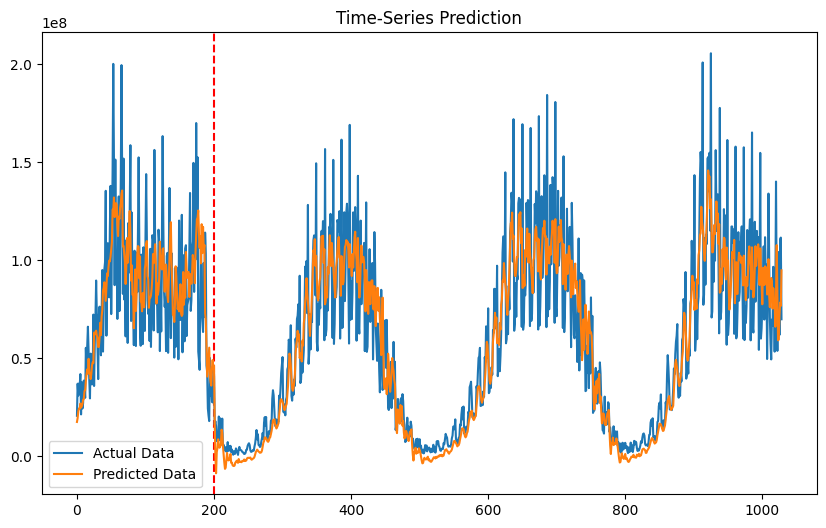

In [430]:

predicted= train_predict * MAX
label_y = y_test * MAX
plt.figure(figsize=(10,6)) 
plt.axvline(x=200, c='r', linestyle='--') 

plt.plot(label_y, label='Actual Data') 
plt.plot(predicted[:,0,0], label='Predicted Data') 
plt.title('Time-Series Prediction')
plt.legend()
plt.show() 

In [431]:
for name, value in performance.items():
  print(f'{name:12s}: {value[1]:0.4f}')
# performance

Baseline    : 0.0370
lstm_model  : 0.0275
gru_model   : 0.0288
biLSTM1_model: 0.0228
biLSTM2_model: 0.0255
biLSTM3_model: 0.0285
